# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png)  Capstone Project:  "Does Wealth = Health?"
*Predicting health based on indicators of financial wellbeing*


## this notebook covers feature selection and engineering. . .

In [1]:
# Import basic Python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# This will allow us to avoid a FutureWarning when plotting.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## load the (already dummied) dataset...

In [4]:
# load data into dataframe from .csv file exported in the previous notebook. . .

#Adjust the path to where you have saved the data
df_feat = pd.read_csv("../data/NFWBS_PUF_2016_data.csv")
df_feat.head()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668


In [5]:
df_feat.shape

(6394, 217)

In [6]:
# set PUF_ID as index
df_feat.set_index('PUF_ID', inplace=True)

In [7]:
df_feat.head()

,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
PUF_ID,,,,,,,,,,,,,,,,,,,,,
10350,2,3,5,5,6,55,3,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
7740,1,3,6,6,6,51,2,2,3,3,...,1,2,3,0,0,0,0,2,0,1.327561
13699,1,3,4,3,4,49,3,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
7267,1,3,6,6,6,49,3,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
7375,1,3,4,4,4,49,3,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668


# FEATURE SELECTION:  Univariate method

In [ ]:
# https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif


In [9]:
df_feat['HEALTH'].value_counts()

 4    2583
 3    2139
 2     781
 5     684
 1     154
-1      53
Name: HEALTH, dtype: int64

In [10]:
# UNIVARIATE FEATURE SELECTION  

# drop target columns
drop_cols=['HEALTH']

X = df_feat.drop(drop_cols, axis = 1) # X = independent columns (potential predictors)
y = df_feat['HEALTH'] # y = target column (what we want to predict)

# instantiate SelectKBest to determine 20 best features  *(f_classif)
best_features = SelectKBest(score_func=f_classif, k=20)
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(20,'Score'))  # print 20 best features

# export selected features to .csv
df_univ_feat = feature_scores.nlargest(20,'Score')
df_univ_feat.to_csv('feature_selection_UNIVARIATE.csv', index=False)

      Feature_Name       Score
159  SELFCONTROL_3  210.973951
190      EMPLOY1_6  169.394051
193      EMPLOY1_9  163.634904
184         EMPLOY  161.525556
7           FWB1_2  147.427363
3            SWB_2  142.752240
2            SWB_1  141.225707
161      OUTLOOK_2  136.065728
177     LIFEEXPECT  133.329626
48        GOALCONF  132.070075
9           FWB1_4  128.684622
5         FWBscore  127.999988
6           FWB1_1  122.718560
178         HHEDUC  122.406861
158  SELFCONTROL_2  121.885615
173       HOUSESAT  120.097573
203       PPINCIMP  115.223380
16         FSscore  115.222144
155        MEMLOSS  114.069342
13          FWB2_2  110.212421


# FEATURE SELECTION:  Feature Importance method

In [14]:
from sklearn.ensemble import RandomForestClassifier
# Feature importance is an inbuilt class that comes with Tree Based Classifiers

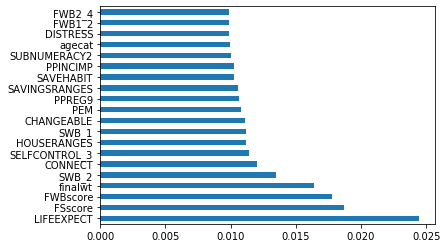

LIFEEXPECT       0.024442
FSscore          0.018709
FWBscore         0.017760
finalwt          0.016417
SWB_2            0.013505
CONNECT          0.011994
SELFCONTROL_3    0.011436
HOUSERANGES      0.011203
SWB_1            0.011169
CHANGEABLE       0.011086
PEM              0.010800
PPREG9           0.010676
SAVINGSRANGES    0.010562
SAVEHABIT        0.010282
PPINCIMP         0.010228
SUBNUMERACY2     0.010062
agecat           0.009962
DISTRESS         0.009866
FWB1_2           0.009866
FWB2_4           0.009860
dtype: float64


In [26]:
# FEATURE IMPORTANCE FEATURE SELECTION

import numpy as np
np.random.seed(42)

# drop target columns
drop_cols=['HEALTH']

X = df_feat.drop(drop_cols, axis = 1) # X = independent columns (potential predictors)
y = df_feat['HEALTH'] # y = target column (what we want to predict)

# instantiate RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X,y)

feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# determine 20 most important features
df_imp_feat = feat_importances.nlargest(20)
# print(rf_model.feature_importances_)

# export selected features to .csv
# df_imp_feat.to_csv('feature_selection_IMPORTANCE.csv', index=False)
df_imp_feat.to_csv('feature_selection_IMPORTANCE.csv')

# plot 20 most important features
# feat_importances.nlargest(20).plot(kind='barh')
df_imp_feat.plot(kind='barh')
plt.show()

print(df_imp_feat)

# FEATURE SELECTION:  Correlation Heatmap method

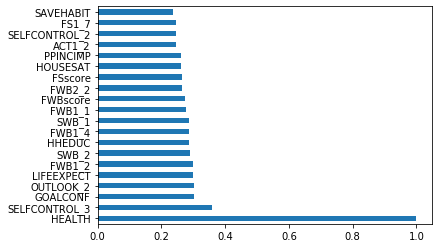

HEALTH           1.000000
SELFCONTROL_3    0.357552
GOALCONF         0.302739
OUTLOOK_2        0.300993
LIFEEXPECT       0.299394
FWB1_2           0.299241
SWB_2            0.290565
HHEDUC           0.287120
FWB1_4           0.285837
SWB_1            0.285760
FWB1_1           0.276365
FWBscore         0.272940
FWB2_2           0.264019
FSscore          0.263269
HOUSESAT         0.262007
PPINCIMP         0.261388
ACT1_2           0.246088
SELFCONTROL_2    0.245164
FS1_7            0.244771
SAVEHABIT        0.237936
Name: HEALTH, dtype: float64


In [25]:
# FEATURE IMPORTANCE CORRELATION

# determine 20 most correlated features
df_corr_health = df_feat.corr()['HEALTH'].sort_values(ascending=False).head(20)
top_corr_features = df_corr_health.index

# plot top 20 most correlated features to our target (HEALTH)
df_corr_health.plot(kind='barh')
plt.show()

# export selected features to .csv
df_corr_health.to_csv('feature_selection_CORRELATION.csv')

print(df_corr_health)

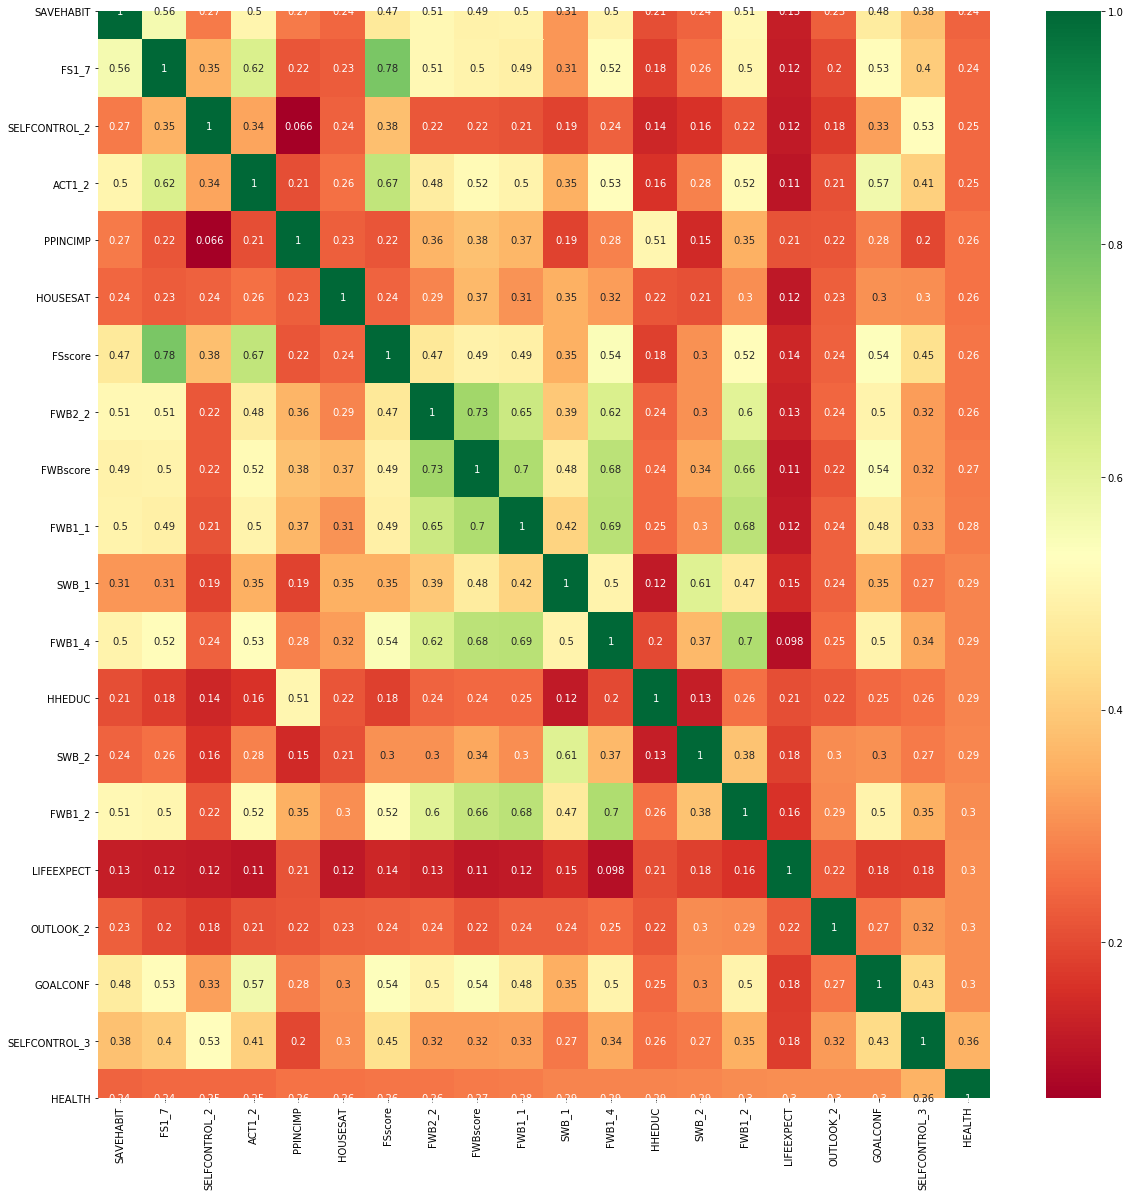

In [28]:
# CORRELATION *(heatmap view)
# view visual correlation of top 20 most correlated features to our target (HEALTH)

df_corr_health = df_feat.corr()['HEALTH'].sort_values().tail(20)
top_corr_features = df_corr_health.index

# plot heatmap
plt.figure(figsize=(20,20))
g=sns.heatmap(df_feat[top_corr_features].corr(),annot=True,cmap="RdYlGn")


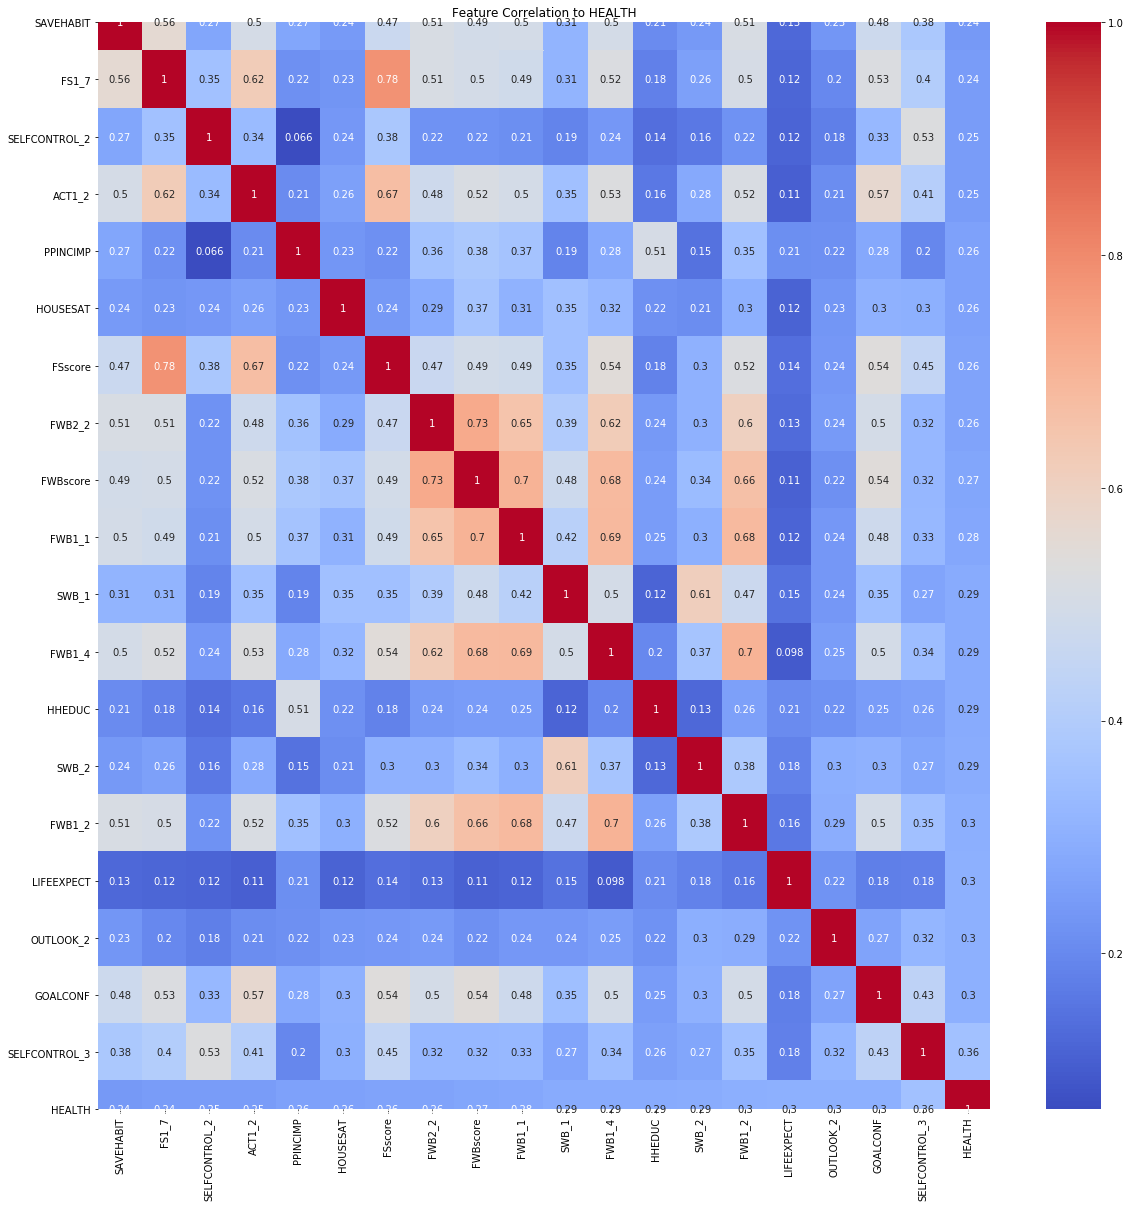

In [29]:
# heatmap
# Use Seaborn's heatmap with pandas .corr() to visualize correlations between all numeric features
# Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. 
# However, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

# plot heatmap
plt.figure(figsize=(20,20))
ax=plt.axes()
ax.set_title("Feature Correlation to HEALTH")

df_corr_health = df_feat.corr()['HEALTH'].sort_values().tail(20)
top_corr_features = df_corr_health.index

sns.heatmap(df_feat[top_corr_features].corr(), cmap='coolwarm', annot=True);


# FEATURE ENGINEERING

We have a multi-class target ("HEALTH") with six unbalanced classes. We will:
 - drop observations where survey respondents "Refused" to provide details 
 - turn this multi-class target into a binary-class target

In [30]:
# We have a multi-class target ("HEALTH") with six unbalanced classes
df_feat['HEALTH'].value_counts()

 4    2583
 3    2139
 2     781
 5     684
 1     154
-1      53
Name: HEALTH, dtype: int64

In [31]:
# Map numeric values to categorical values (for exploratory purposes only) 
# to observe unbalanced classes and labels
df_health = df_feat[['HEALTH']].replace({"HEALTH":{
  -1: "Refused",
  1: "Poor",
  2: "Fair",
  3: "Good",
  4: "Very good",
  5: "Excellent"
}})

df_health['HEALTH'].value_counts()

Very good    2583
Good         2139
Fair          781
Excellent     684
Poor          154
Refused        53
Name: HEALTH, dtype: int64

In [32]:
# Drop observations where survey respondents "Refused" to provide details (value = -1)
# Note:  (53) rows represents less than 1% of total data

print('Before shape: ', df_feat.shape)

# filtering: identify all rows with "Refused" (value = -1)
# df_feat[df_feat['HEALTH'] == -1]
# df_refused['HEALTH'].value_counts()

# drop all rows with "Refused" (value = -1)
df_feat = df_feat[df_feat['HEALTH'] != -1]

print('After shape: ', df_feat.shape)

df_feat['HEALTH'].value_counts()

Before shape:  (6394, 216)
After shape:  (6341, 216)


4    2583
3    2139
2     781
5     684
1     154
Name: HEALTH, dtype: int64

### Setting up a binary classification

In [33]:
# Create the POSITIVE class (1): "Sub-Optimal Health"

# (a) move "Good" (value = 3), "Fair" (value = 2), "Poor" (value = 1) into "Sub-Optimal Health"
# filtering: identify all rows with "Good" (value = 3), "Fair" (value = 2), "Poor" (value = 1)
df_feat.loc[df_feat['HEALTH'].isin([1,2,3]), 'HEALTH'] = 1
df_feat['HEALTH'].value_counts()


1    3074
4    2583
5     684
Name: HEALTH, dtype: int64

In [34]:
# Create the NEGATIVE class (0): "Optimal Health"

# (b) move "Excellent" (value = 5) and "Very good" (value = 4) into "Optimal Health"
# filtering: identify all rows with "Excellent" (value = 5) and "Very good" (value = 4)
df_feat.loc[df_feat['HEALTH'].isin([4,5]), 'HEALTH'] = 0
df_feat['HEALTH'].value_counts()


0    3267
1    3074
Name: HEALTH, dtype: int64

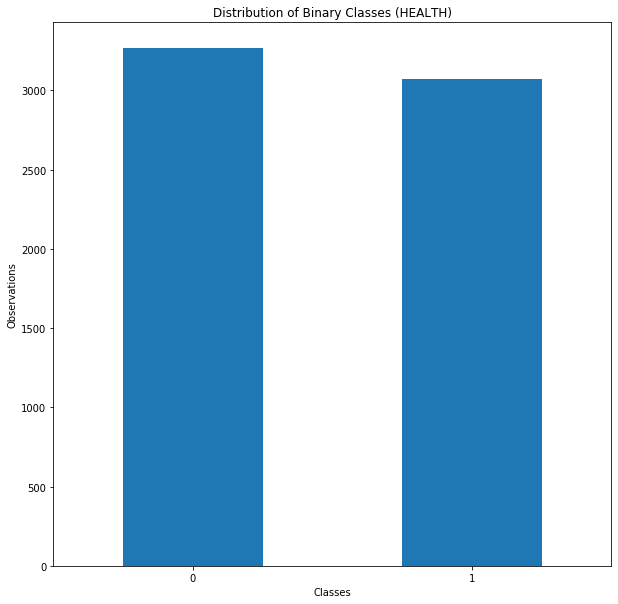

In [50]:
# plot distribution of HEALTH classes
# classes are more balanced now
# df_feat['HEALTH'].value_counts().plot(kind='bar', rot=0);


# 1. Create a bar chart showing how many missing values are in each column
plt.figure(figsize=(10,10))

df_feat['HEALTH'].value_counts().plot(kind='bar', rot=0);

# Add a title and show the plot.
plt.title('Distribution of Binary Classes (HEALTH)')
# Create tick mark labels on the Y axis and rotate them.
# plt.xticks(rotation = 45)
# Create X axis label.
plt.xlabel("Classes")
# Create Y axis label.
plt.ylabel("Observations");


In [49]:
# plot distribution of HEALTH classes
# classes are imbalanced
plt.figure(figsize=(10,10))

df_cfpb['HEALTH'].value_counts().plot(kind='bar', rot=0);
# Add a title and show the plot.
plt.title('Distribution of Binary Classes (HEALTH)')
# Create tick mark labels on the Y axis and rotate them.
# plt.xticks(rotation = 45)
# Create X axis label.
plt.xlabel("Unique Values")
# Create Y axis label.
plt.ylabel("Observations");

NameError: name 'df_cfpb' is not defined

<Figure size 720x720 with 0 Axes>

## Create dataset for modeling:
40) selected features and (1) target engineered for binary classification

In [39]:
# selected features (including target) = 40 columns
# df_cols = pd.DataFrame(df_feat.columns)
# df_cols
keep_cols=['HEALTH','SWB_1','SWB_2','SWB_3','FWBscore','FWB1_1','FWB1_2','FWB1_4',
           'FWB2_2','FSscore','ACT1_2','FINGOALS','CHANGEABLE','GOALCONF',
           'EARNERS','VOLATILITY',
           'SNAP','MATHARDSHIP_1','MATHARDSHIP_2','MATHARDSHIP_4','MATHARDSHIP_5',
           'BENEFITS_1','CONNECT','DISTRESS','SELFCONTROL_2','SELFCONTROL_3',
           'OUTLOOK_2','PEM','HOUSESAT','LIFEEXPECT','HHEDUC','PPINCIMP',
           'PPREG4','PPREG9',
           'fpl','agecat','generation','PPGENDER','PPMARIT','PPETHM'
          ]

df_final = pd.DataFrame(df_feat, columns=keep_cols)
df_final.head()


,HEALTH,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_4,FWB2_2,FSscore,...,HHEDUC,PPINCIMP,PPREG4,PPREG9,fpl,agecat,generation,PPGENDER,PPMARIT,PPETHM
PUF_ID,,,,,,,,,,,,,,,,,,,,,
10350,1,5,5,6,55,3,3,3,3,44,...,4,7,4,8,3,8,1,1,3,1
7740,1,6,6,6,51,2,2,3,2,43,...,2,6,2,3,3,3,3,1,3,1
13699,1,4,3,4,49,3,3,3,3,42,...,3,6,4,9,3,3,3,1,3,2
7375,1,4,4,4,49,3,3,3,3,42,...,2,7,2,4,3,2,4,1,1,3
10910,0,5,7,5,67,5,1,1,5,57,...,4,7,2,3,3,2,4,1,1,1


In [40]:
df_final.shape

(6341, 40)

In [41]:
df_final.describe()

,HEALTH,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_4,FWB2_2,FSscore,...,HHEDUC,PPINCIMP,PPREG4,PPREG9,fpl,agecat,generation,PPGENDER,PPMARIT,PPETHM
count,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,...,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000
mean,0.484782,5.354203,5.363350,5.432739,56.035956,3.050623,3.193660,3.288283,3.391894,50.730957,...,3.515534,5.515849,2.645955,5.147453,2.659991,4.455922,2.547232,1.475162,2.039268,1.621511
std,0.499808,1.496708,1.542809,1.613261,14.139658,1.233647,1.111326,1.047682,1.261861,12.573701,...,1.190639,2.668713,1.031382,2.526863,0.656073,2.117783,1.045427,0.499422,1.393384,1.076830
min,0.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-1.000000,...,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,5.000000,5.000000,5.000000,48.000000,2.000000,3.000000,3.000000,3.000000,42.000000,...,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000
50%,0.000000,6.000000,6.000000,6.000000,56.000000,3.000000,3.000000,3.000000,3.000000,50.000000,...,4.000000,6.000000,3.000000,5.000000,3.000000,4.000000,2.000000,1.000000,1.000000,1.000000
75%,1.000000,6.000000,7.000000,7.000000,65.000000,4.000000,4.000000,4.000000,4.000000,57.000000,...,5.000000,8.000000,3.000000,7.000000,3.000000,6.000000,3.000000,2.000000,3.000000,2.000000
max,1.000000,7.000000,7.000000,7.000000,95.000000,5.000000,5.000000,5.000000,5.000000,85.000000,...,5.000000,9.000000,4.000000,9.000000,3.000000,8.000000,4.000000,2.000000,5.000000,4.000000


In [42]:
# age is showing unreasonable outliers
df_final.FWBscore.describe()

count    6341.000000
mean       56.035956
std        14.139658
min        -4.000000
25%        48.000000
50%        56.000000
75%        65.000000
max        95.000000
Name: FWBscore, dtype: float64

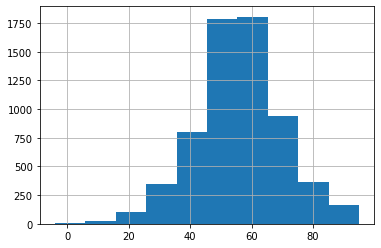

In [44]:
# distribution of Financial Wellbeing Score
df_final['FWBscore'].hist();


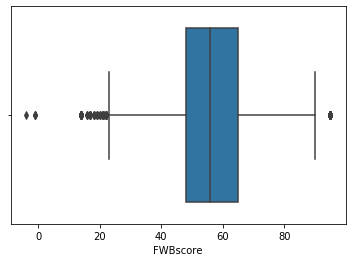

In [45]:
# look for outliers
# Plot variables with potential outliers using boxplots
sns.boxplot(df_final.FWBscore);



In [46]:
# export dataframe to .csv
df_final.to_csv('NFWBS_40_FEATURES_export.csv', index=True)


In [47]:
# test the export

df_test = pd.read_csv("./NFWBS_40_FEATURES_export.csv")
print(df_test.shape)
df_test.head()

(6341, 41)


,PUF_ID,HEALTH,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_4,FWB2_2,...,HHEDUC,PPINCIMP,PPREG4,PPREG9,fpl,agecat,generation,PPGENDER,PPMARIT,PPETHM
0,10350,1,5,5,6,55,3,3,3,3,...,4,7,4,8,3,8,1,1,3,1
1,7740,1,6,6,6,51,2,2,3,2,...,2,6,2,3,3,3,3,1,3,1
2,13699,1,4,3,4,49,3,3,3,3,...,3,6,4,9,3,3,3,1,3,2
3,7375,1,4,4,4,49,3,3,3,3,...,2,7,2,4,3,2,4,1,1,3
4,10910,0,5,7,5,67,5,1,1,5,...,4,7,2,3,3,2,4,1,1,1
